<hr>
<font size = 6>MS0240: Mathematics for AI CA1 Assignment</font><br>
<font size = 5>Question 1 (using dairy_nutrition_0.xlsx)</font>
<hr>
<font size = 4>Name: Lee Hong Yi <br>
Admin No: 2223010 <br>
Class: DAAA/FT/2A/05 </font>
<hr>

Importing packages and datafiles

In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

q1_data = pd.read_excel("./dataset_0/dataset_0/dairy_nutrition_0.xlsx")
q1_data.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [485]:
q1_data = q1_data.drop(columns=['Description'])
q1_data.head()

,Type,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,3.15,3.27,4.78,5.05,46,0.036,0.45,113


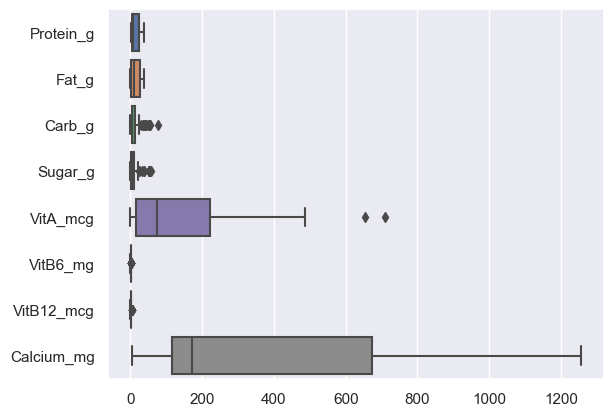

In [486]:
sns.boxplot(q1_data, orient = 'h')
plt.show()

In [487]:
q1_columns = q1_data.columns
display(list(q1_columns))

['Type',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'Calcium_mg']

We standardize the dataset using StandardScaler.

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.342581,0.471107,-0.116207,-0.332884,-0.510307,0.422007,0.256601,0.178980
1,-0.547316,0.421460,0.046875,0.015879,0.286821,-0.234754,-0.394386,-0.476919
2,-0.396136,-0.533218,0.582394,0.046177,0.029203,-0.264567,-0.195112,-0.329428
3,-0.517617,-0.459696,-0.263601,-0.120235,-0.341127,-0.254206,-0.267289,-0.429393
4,-0.517723,-0.458887,-0.264455,-0.120259,-0.341197,-0.254258,-0.267343,-0.429480


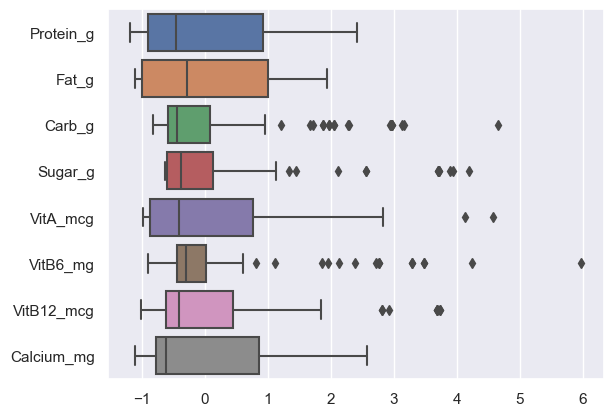

In [488]:
scaler = StandardScaler()
scaler.fit(q1_data.loc[:,'Protein_g':])
q1_data.loc[:,'Protein_g':] = scaler.transform(q1_data.loc[:,'Protein_g':])
q1_reduced_data = pd.DataFrame(normalize(q1_data.loc[:,'Protein_g':]), columns = list(q1_columns[1:]))
display(q1_reduced_data.head())
sns.boxplot(q1_data, orient = 'h')
plt.show()

Creating functions for use later

In [489]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [490]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=15, height=15, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.03

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.02, head_length=0.02, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i+1], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

In [491]:
#This function generates the scoreplot

def scoreplot_label(data, scores, pca, width=10, height=10, margin=0.5, categorise=None):
    fig, ax = plt.subplots(figsize=(width, height))

    x_min = min(scores.iloc[:, 0].min(), 0)-margin
    x_max = max(scores.iloc[:, 0].max(), 0)+margin
    y_min = min(scores.iloc[:,1].min(), 0)-margin
    y_max = max(scores.iloc[:,1].max(), 0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)

    if categorise is not None and isinstance(categorise, pd.Series):
        df = pd.concat([scores, categorise], axis=1)
        sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df[categorise.name])
        plt.legend(
            loc='upper center', 
            bbox_to_anchor=(0.5,-0.05), 
            fancybox=True, 
            ncol=5)
    else:
        return ax

In [504]:
#This function adds a new point to the graph

def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color, marker = 'x', s = 1000)
    plot.show()

In [493]:
pca = PCA(n_components=8).fit(q1_data.loc[:,'Protein_g':])
pca_samples = pca.transform(q1_data.loc[:,'Protein_g':])

pca_results = pca_results(q1_data.loc[:,'Protein_g':], pca)
display(pca_results)


,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7637,0.4676,0.4745,0.3005,0.0390,0.0609,0.3741,0.3536,0.4381,0.4716
PC 2,2.1827,0.2712,-0.1014,-0.3131,0.6236,0.6090,-0.1557,0.2626,0.1830,-0.0721
PC 3,0.8887,0.1104,0.1354,-0.5779,-0.2920,-0.3360,-0.4516,0.3793,0.3062,0.0890
PC 4,0.4650,0.0578,-0.3480,-0.0269,-0.0775,-0.1667,0.5098,0.6316,-0.0605,-0.4265
PC 5,0.3367,0.0418,0.0062,-0.6663,-0.0577,0.0437,0.6064,-0.3863,0.0544,0.1756
PC 6,0.1932,0.0240,-0.2045,0.1388,0.2329,-0.3201,0.0188,-0.3278,0.7525,-0.3289
PC 7,0.1409,0.0175,0.4070,-0.1082,0.6358,-0.5511,0.0478,0.0286,-0.3243,-0.0800
PC 8,0.0773,0.0096,-0.6463,0.0448,0.2376,-0.2768,-0.0402,0.0758,-0.0521,0.6612


In [494]:
for i, row in pca_results.drop(columns=["Eigenvalue", "Explained Variance"]).iterrows():
    listing = []
    print(f"Equation for {i}:")
    for j in range(len(row)):
        listing.append(str(row[j]) + f"z{j+1}")
    print(" + ".join(listing))

Equation for PC 1:
0.4745z1 + 0.3005z2 + 0.039z3 + 0.0609z4 + 0.3741z5 + 0.3536z6 + 0.4381z7 + 0.4716z8
Equation for PC 2:
-0.1014z1 + -0.3131z2 + 0.6236z3 + 0.609z4 + -0.1557z5 + 0.2626z6 + 0.183z7 + -0.0721z8
Equation for PC 3:
0.1354z1 + -0.5779z2 + -0.292z3 + -0.336z4 + -0.4516z5 + 0.3793z6 + 0.3062z7 + 0.089z8
Equation for PC 4:
-0.348z1 + -0.0269z2 + -0.0775z3 + -0.1667z4 + 0.5098z5 + 0.6316z6 + -0.0605z7 + -0.4265z8
Equation for PC 5:
0.0062z1 + -0.6663z2 + -0.0577z3 + 0.0437z4 + 0.6064z5 + -0.3863z6 + 0.0544z7 + 0.1756z8
Equation for PC 6:
-0.2045z1 + 0.1388z2 + 0.2329z3 + -0.3201z4 + 0.0188z5 + -0.3278z6 + 0.7525z7 + -0.3289z8
Equation for PC 7:
0.407z1 + -0.1082z2 + 0.6358z3 + -0.5511z4 + 0.0478z5 + 0.0286z6 + -0.3243z7 + -0.08z8
Equation for PC 8:
-0.6463z1 + 0.0448z2 + 0.2376z3 + -0.2768z4 + -0.0402z5 + 0.0758z6 + -0.0521z7 + 0.6612z8


Generating a screeplot to show the eigenvalues of each principal component.

<Figure size 640x480 with 0 Axes>

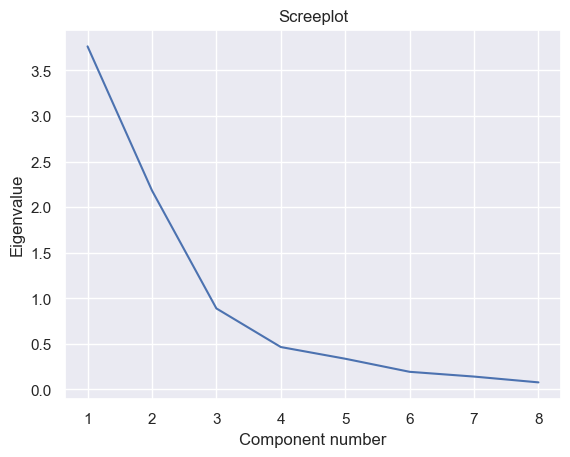

In [495]:
#Scree plot
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

- Since the elbow is at the 3rd PC, we shall take the first 2. <br>
- In addition, following Kaiser's rule, we shall only take the PCs with a eigenvalue >1, hence we only take the first 2.<br>
- As the first two PCs explain 74% of the total variance, we only need to take the first 2.


In [496]:
pca_results = pca_results.iloc[:2]
display(pca_results)

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7637,0.4676,0.4745,0.3005,0.0390,0.0609,0.3741,0.3536,0.4381,0.4716
PC 2,2.1827,0.2712,-0.1014,-0.3131,0.6236,0.6090,-0.1557,0.2626,0.1830,-0.0721


Generating a loading plot to show how strongly each characteristic influences a principal component.

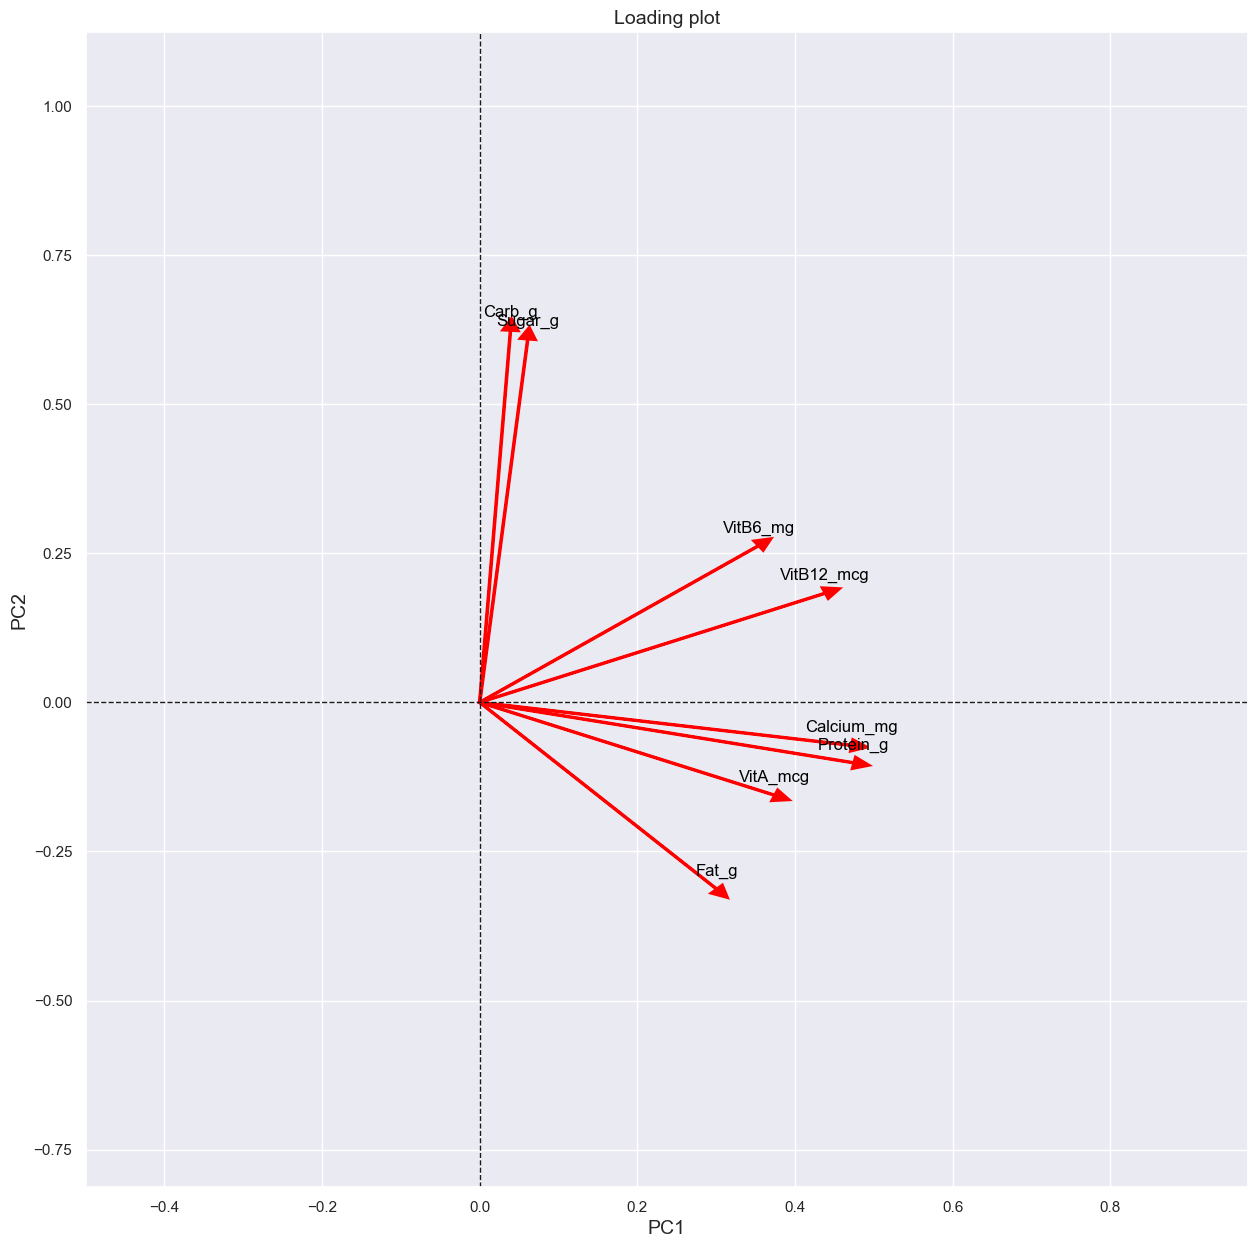

In [497]:
ax2 = loadingplot(q1_data, pca) 
plt.show()

Now, we represent each variable and record by their PC scores. To do that, we find the dot product of the original data, and the eigenvectors associated with the principal components.

In [518]:
#Obtain scores from original data that are not centred
scores_notcentred = np.dot(q1_data.loc[:,'Protein_g':], pca.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
scores_notcentred = scores_notcentred.iloc[:,:3]
display(scores_notcentred)

,PC1,PC2,PC3
0,0.834591,-0.447760,0.777832
1,-0.861733,-0.310750,-1.229313
2,-1.336245,1.059763,-0.276380
3,-1.706614,-0.132342,0.455606
4,-1.706177,-0.133763,0.455082
...,...,...,...
162,-1.761946,1.407944,0.163698
163,1.126487,0.900640,-1.836173
164,-0.584681,4.411443,-2.165219
165,-1.082310,3.685854,-3.707466


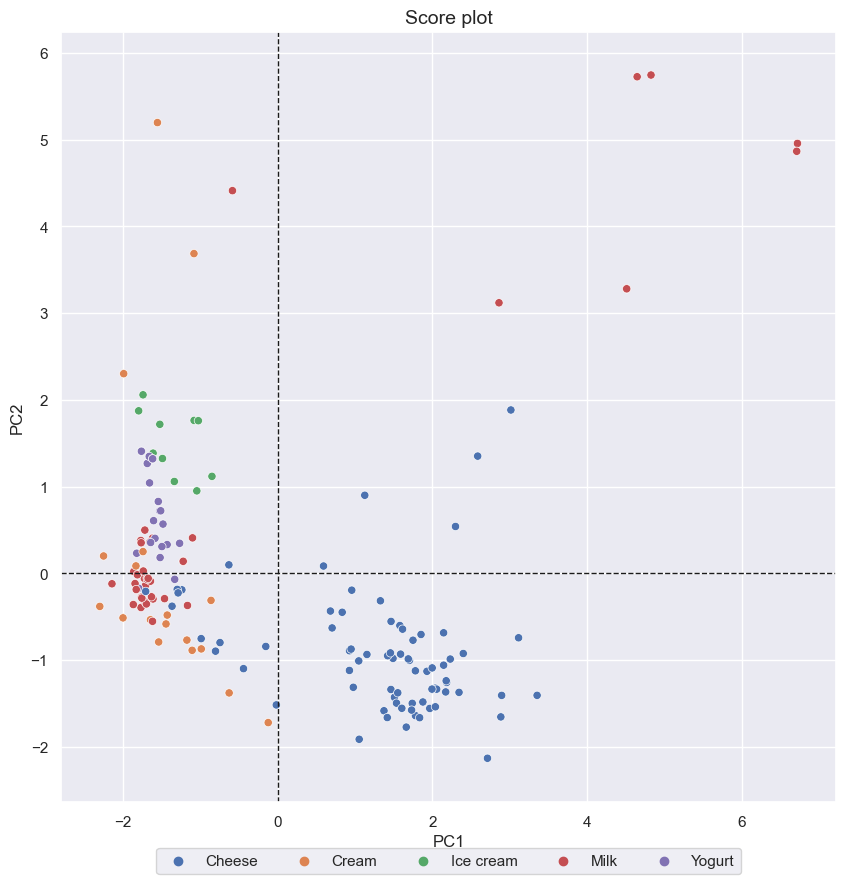

In [529]:
ax = scoreplot_label(q1_data, scores_notcentred[["PC1","PC2"]], pca = pca, categorise = q1_data['Type'])

Obtaining the loads for Product 1 and 2, to plot them on the scoreplot to identify which product they are likely to be.

In [524]:
data_set_a = {'Protein_g': 22.17, 'Fat_g': 22.35, 'Carb_g': 2.22, 'Sugar_g': 1.01, 'VitA_mcg': 181, 'VitB6_mg': 0.034, 'VitB12_mcg': 2.28, 'Calcium_mg': 505}

data_set_b = {'Protein_g': 4.32, 'Fat_g': 1.42, 'Carb_g': 23.0, 'Sugar_g': 14.58, 'VitA_mcg': 13, 'VitB6_mg': 0.047, 'VitB12_mcg': 0.53, 'Calcium_mg': 114}

df_a = pd.DataFrame([data_set_a])
df_b = pd.DataFrame([data_set_b])

combined_data = pd.concat([df_a, df_b], ignore_index=True)
# display(combined_data)

transformed_cData = pd.DataFrame(scaler.transform(combined_data), columns=['Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'Calcium_mg'])
display(transformed_cData)
cData_scores = np.dot(transformed_cData, pca.components_.T)
display(cData_scores)
cData_scores = pd.DataFrame(cData_scores, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
cData_scores = cData_scores.iloc[:,:3]
display(cData_scores)

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.901241,0.731790,-0.667102,-0.555297,0.435978,-0.486528,1.672436,0.367246
1,-0.827959,-0.986179,0.844973,0.575471,-0.878563,-0.328925,-0.391711,-0.777934


array([[ 1.48465668, -0.99082196,  0.24391467, -0.53189084,  0.1399842 ,
         1.24504674, -0.39542214, -0.45320787],
       [-1.60462484,  1.30499157,  0.10055567, -0.14690302,  0.06473245,
         0.09743235,  0.12773487,  0.04877971]])

,PC1,PC2,PC3
0,1.484657,-0.990822,0.243915
1,-1.604625,1.304992,0.100556


Attempting to find out where product 1 lies on the score plot, to identify which product it is likely to be.

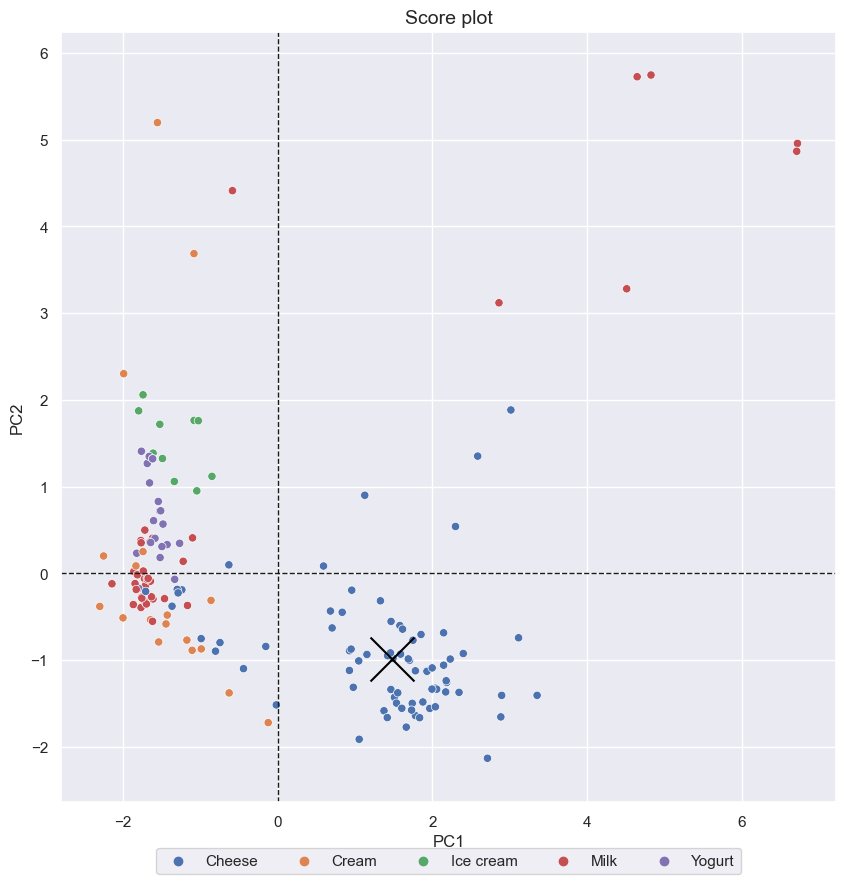

In [530]:
ax = scoreplot_label(q1_data, scores_notcentred[["PC1","PC2"]], pca = pca, categorise = q1_data['Type'])
AddPoint(plt , x = cData_scores.iloc[0,0], y = cData_scores.iloc[0,1], color = "black")
plt.show()

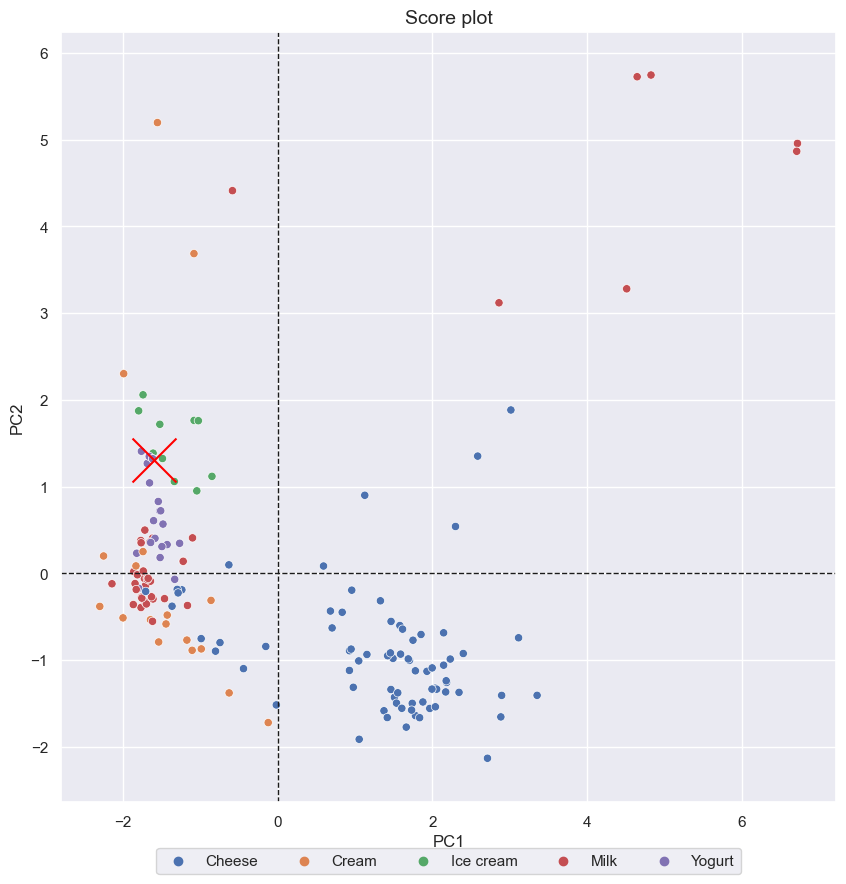

In [531]:
ax = scoreplot_label(q1_data, scores_notcentred[["PC1","PC2"]], pca = pca, categorise = q1_data['Type'])
AddPoint(plt , x = cData_scores.iloc[1,0], y = cData_scores.iloc[1,1], color = "red")
plt.show()

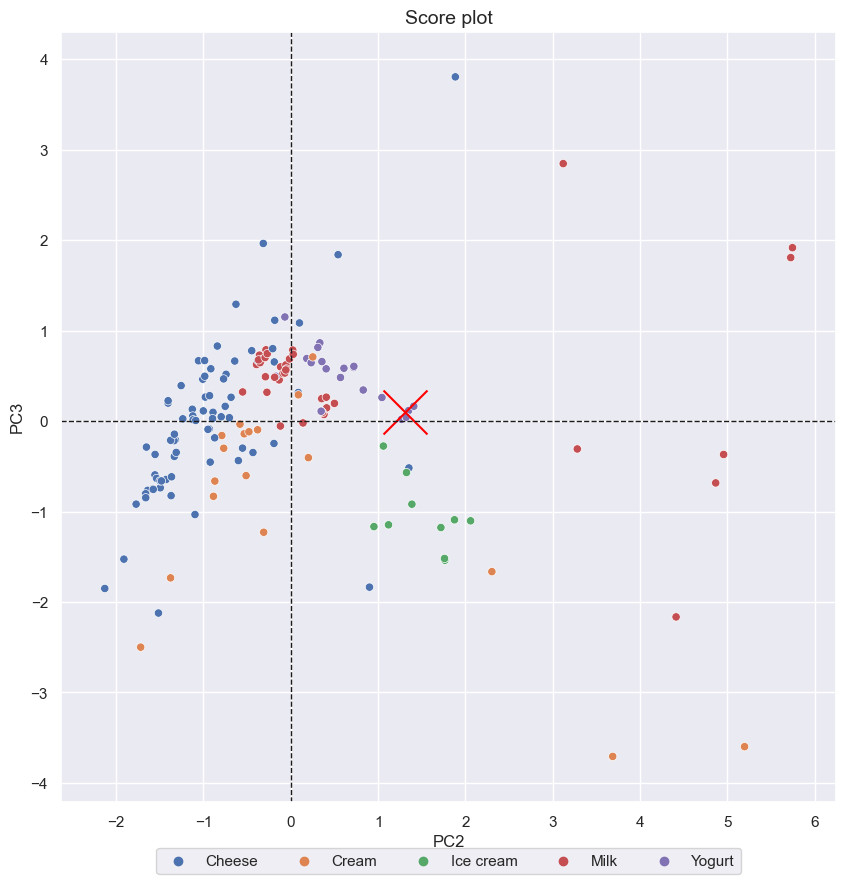

In [535]:
ax = scoreplot_label(q1_data, scores_notcentred[["PC2","PC3"]], pca = pca, categorise = q1_data['Type'])
AddPoint(plt , x = cData_scores.iloc[1,1], y = cData_scores.iloc[1,2], color = "red")
plt.show()

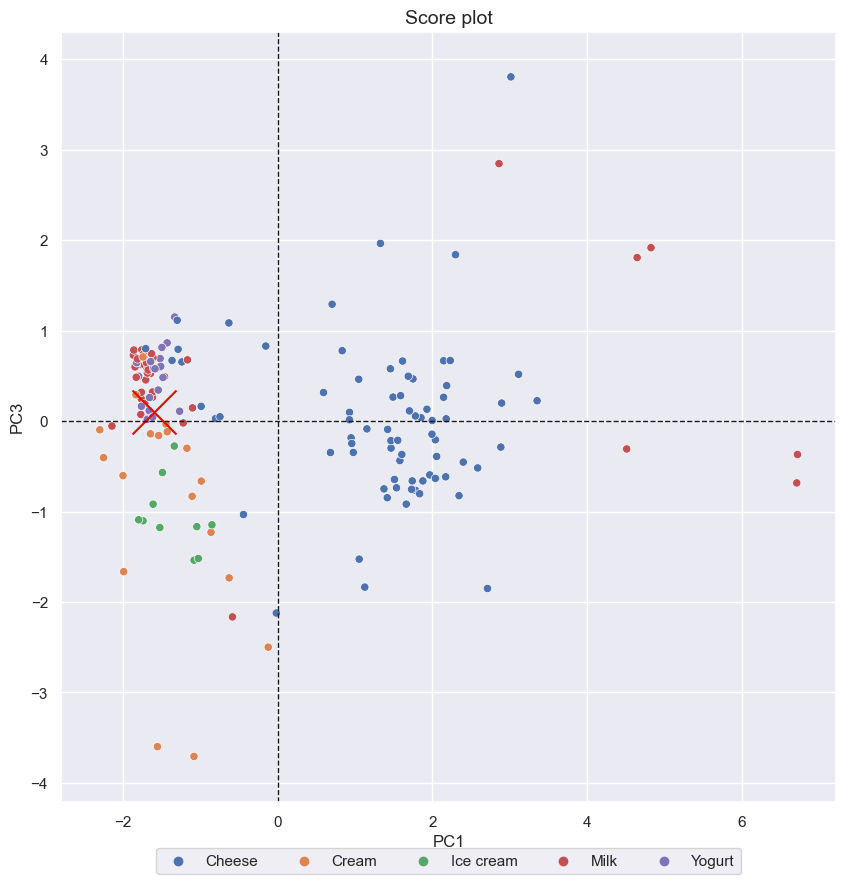

In [534]:
ax = scoreplot_label(q1_data, scores_notcentred[["PC1","PC3"]], pca = pca, categorise = q1_data['Type'])
AddPoint(plt , x = cData_scores.iloc[1,0], y = cData_scores.iloc[1,2], color = "red")
plt.show()